In [1]:
import os
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyod.models.pca import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import QuantileTransformer

In [3]:
sys.path.append('../')
from src.analysis.test_outlier_detector import TestOutlierDetector

In [4]:
%matplotlib notebook

plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.serif'] = "cm"

In [5]:
data_path = '/Users/christopherwmurphy/Documents/projects/lhc_olympics/LHC-Olympics-2020/data_processed'

In [6]:
df = pd.read_hdf(os.path.join(data_path, 'processed_labeled.h5'), key='processed')

In [8]:
test = TestOutlierDetector()

In [9]:
feature_cols = ['pt_1', 'pt_2', 'mass_1+mass_2', '|mass_1-mass_2|', 'tau21_1', 'tau21_2', 'sqrt(tau1(2))/tau1(1)_1', 
                'tau32_1', 'tau43_1', 'sqrt(tau1(2))/tau1(1)_2', 'tau32_2', 'tau43_2']

In [10]:
def scorer(sample_fracs):
    sb_scores_list = []
    b_scores_list = []
    for sample_frac in sample_fracs:
        sb_scores, b_scores = test.test_outlier_detector(
            df, 
            PCA(n_components=11, n_selected_components=1), 
            StratifiedKFold(n_splits=5, shuffle=True),
            transformer=QuantileTransformer(),
            feature_cols=feature_cols,
            sample_frac=sample_frac
        )
        sb_scores_list += [sb_scores]
        b_scores_list += [b_scores]
    return (sb_scores_list, b_scores_list)

In [11]:
sb_scores_list, b_scores_list = scorer([1., 0.1, 0.05, 0.02])

In [12]:
titles = [r'$S / B = 1 / 10$', r'$S / B = 1 / 100$', r'$S / B = 1 / 200$', r'$S / B = 1 / 500$']

<IPython.core.display.Javascript object>


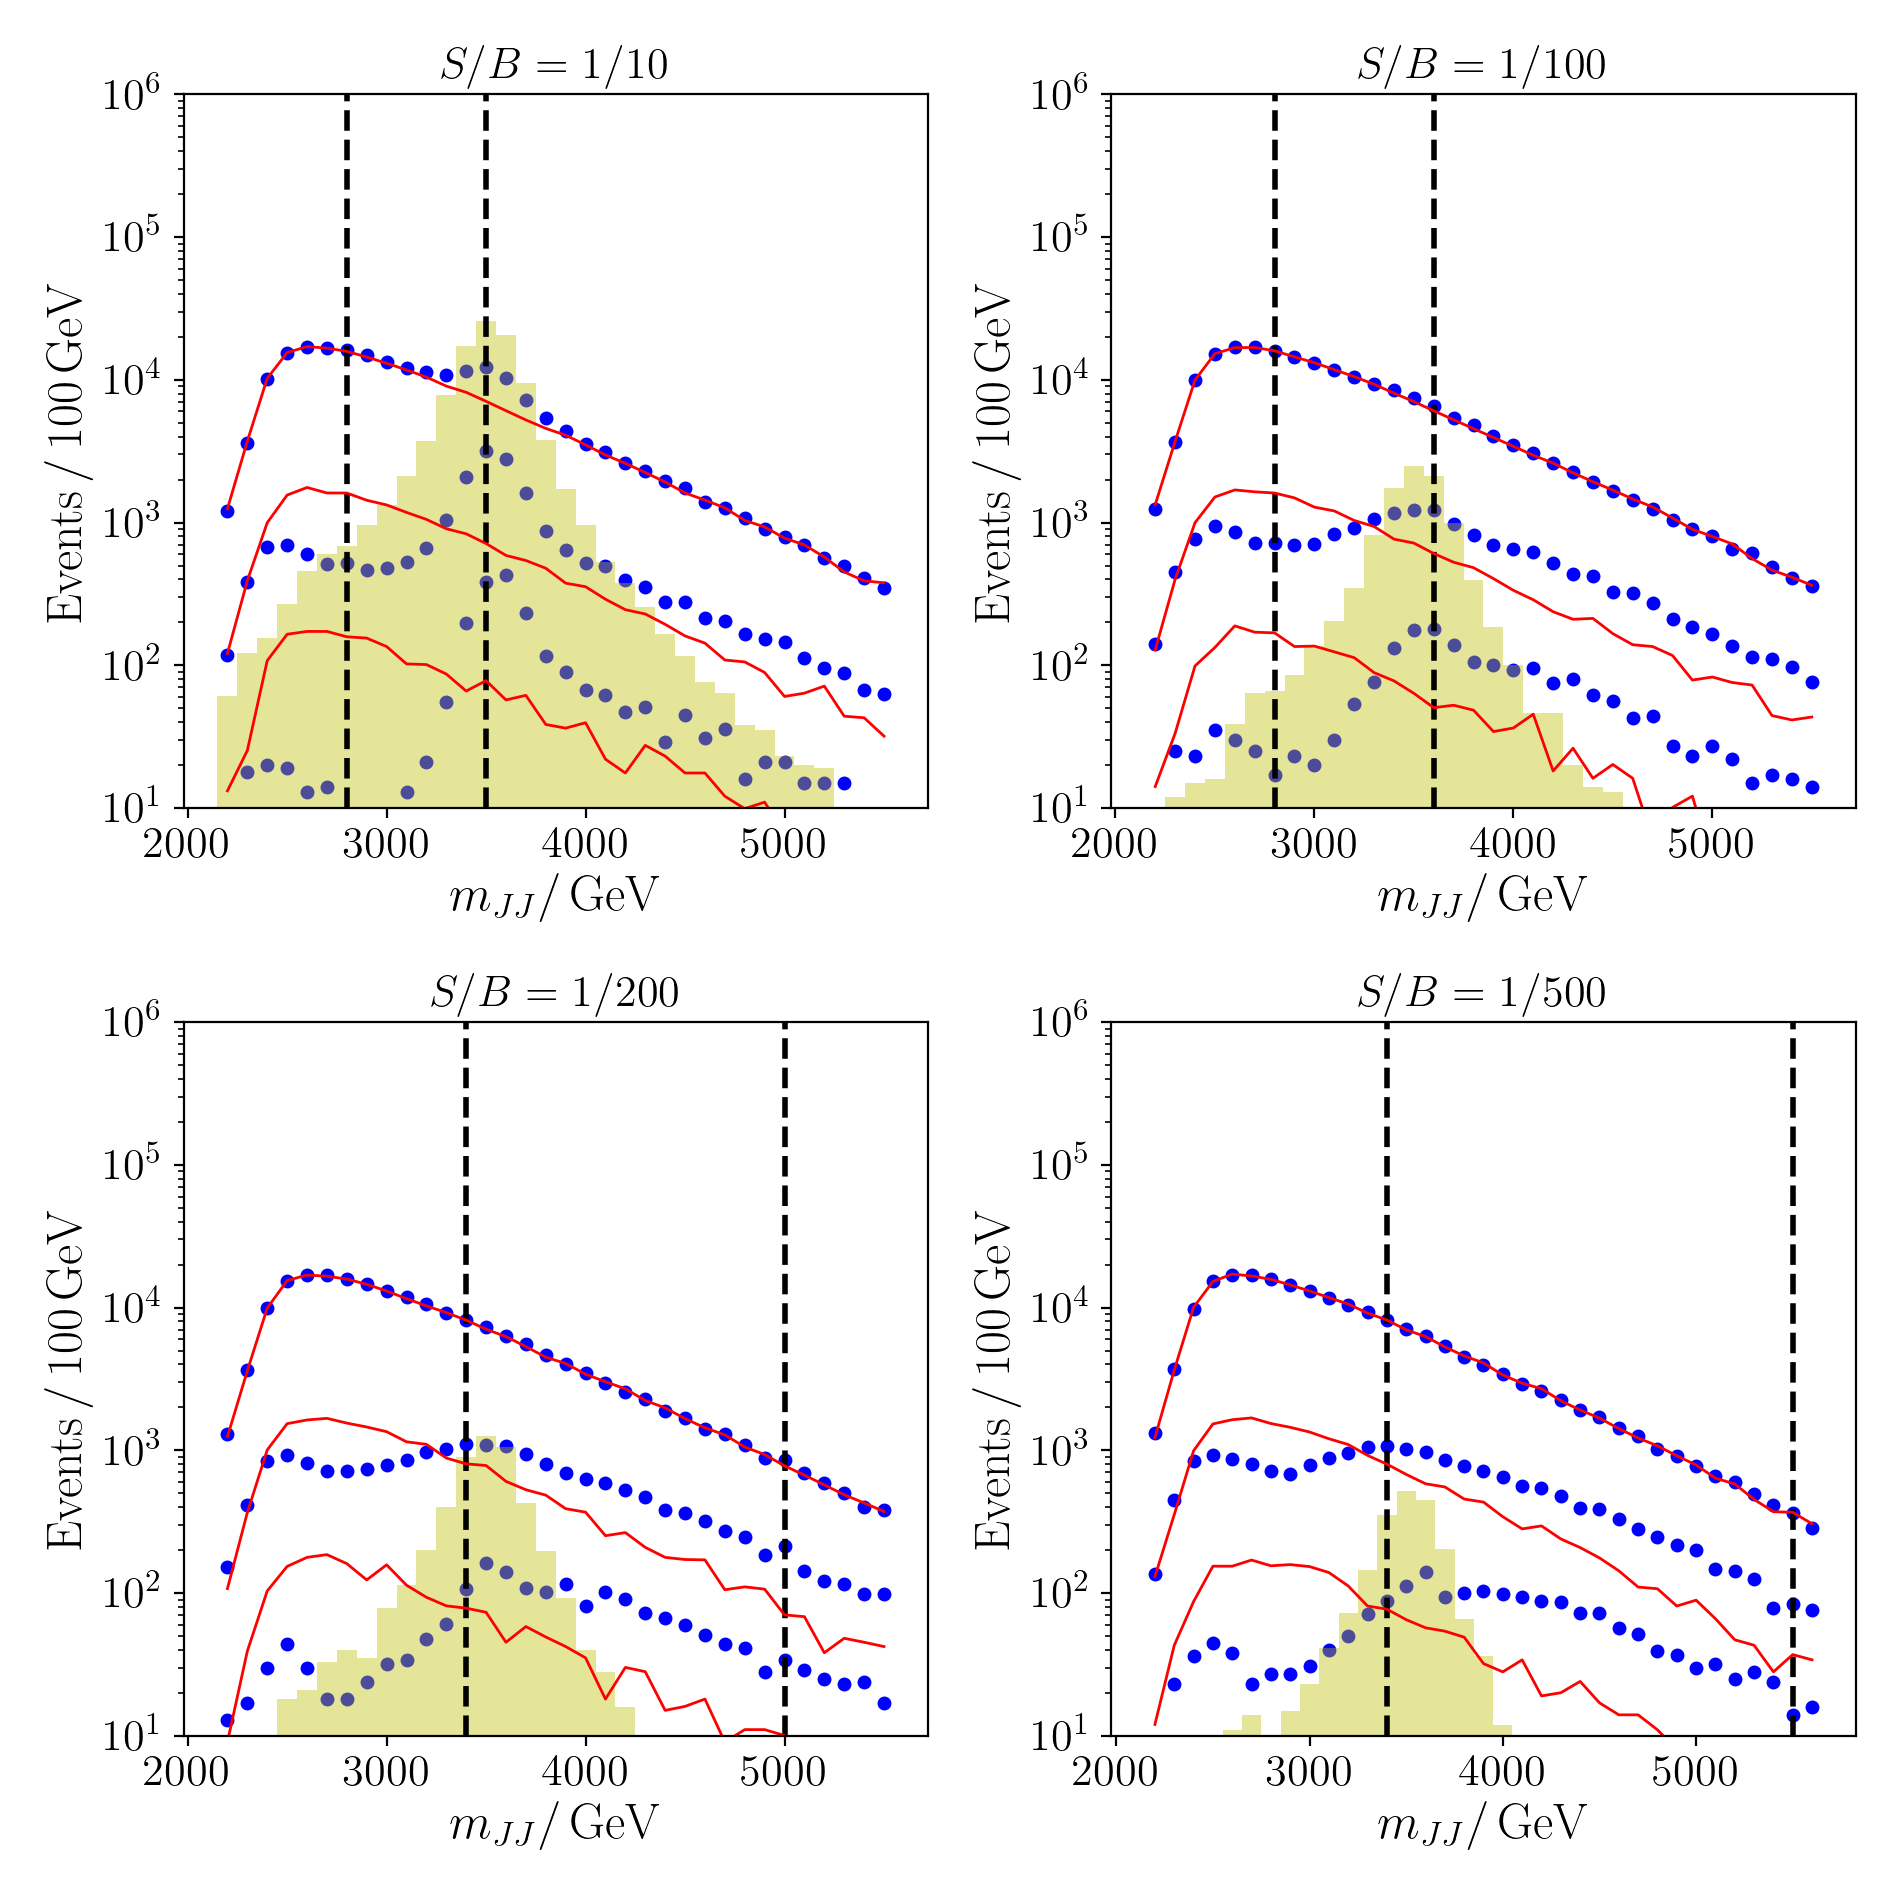

In [13]:
test.plot_outlier_detections(
    sb_scores_list, 
    b_scores_list, 
    title_list=titles, 
    figsize=(9.5, 9.5), 
    quantiles=[0.0, 0.9, 0.99],
    file_name='/Users/christopherwmurphy/Documents/projects/lhc_olympics/LHC-Olympics-2020/images/outlier_detection',
    file_types=['.png', '.pdf']
)